# Homework 1

![image.png](attachment:image.png)

## Dataset
First download the training and validation data. You can just download it manually (by pasting the https://www.dropbox.com... link in your browser), or using the terminal commands `curl` (`wget` is an alternative command):

In [ ]:
! curl -L --output galaxy_train.h5 "https://www.dropbox.com/scl/fi/31l0ytuz4ze921uzg521o/galaxy_train.h5?rlkey=5ir4jo1d6xjykqkncj1sawmh0&dl=1"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   264    0   264    0     0    264      0 --:--:-- --:--:-- --:--:--   264
100   496    0   496    0     0    231      0 --:--:--  0:00:02 --:--:--     0
100  443M  100  443M    0     0  6721k      0  0:01:07  0:01:07 --:--:-- 8211k 0:01:19 5491k0  4793k      0  0:01:34  0:00:26  0:01:08 4084kk      0  0:01:08  0:01:06  0:00:02 7496k


In [ ]:
! curl -L --output galaxy_val.h5 "https://www.dropbox.com/scl/fi/psdf9wsxwpv2ayuel5zvt/galaxy_val.h5?rlkey=lmhnl6670pag5nhejhwlt7pze&dl=1"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   264    0   264    0     0    171      0 --:--:--  0:00:01 --:--:--   172
100   496    0   496    0     0    138      0 --:--:--  0:00:03 --:--:--   279
100 55.4M  100 55.4M    0     0  4927k      0  0:00:11  0:00:11 --:--:-- 8375k


In [ ]:
path_to_training_data = 'galaxy_train.h5'
path_to_validation_data = 'galaxy_val.h5'

### activate autoreload so any changes you make to dataloader.py, model.py are automatically imported

In [ ]:
%load_ext autoreload
%autoreload 2

## now, write a custom dataloader for the dataset



In [ ]:
from dataset import CustomDataset

## you should get something that works like this:

In [ ]:
training_ds = CustomDataset(path_to_training_data)
validation_ds = CustomDataset(path_to_validation_data)

In [ ]:
some_random_idx = 12
training_ds[some_random_idx]

(tensor([36.0750, 31.8150, 31.6838,  ..., 33.4781, 31.3675, 36.1256]),
 tensor(7))

## now create the data loaders, and set the batch size.
remember to shuffle the training dataset

In [ ]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [ ]:
for x,y in training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([300, 4096]) torch.Size([300])


In [ ]:
len(training_ds)

14188

In [ ]:
print(y)

tensor([0, 3, 3, 7, 9, 2, 7, 4, 7, 9, 7, 5, 1, 6, 8, 2, 3, 2, 9, 0, 4, 2, 8, 7,
        1, 6, 7, 1, 8, 7, 9, 8, 9, 1, 3, 2, 2, 1, 9, 2, 6, 0, 9, 3, 3, 3, 8, 5,
        2, 6, 2, 6, 9, 0, 2, 1, 3, 3, 6, 7, 9, 2, 1, 8, 5, 6, 7, 5, 2, 2, 1, 8,
        5, 3, 3, 4, 3, 2, 3, 6, 6, 2, 6, 2, 2, 5, 7, 3, 3, 7, 2, 6, 7, 1, 9, 2,
        2, 8, 2, 5, 0, 1, 9, 3, 5, 8, 8, 7, 7, 6, 5, 3, 0, 3, 0, 8, 2, 9, 7, 8,
        3, 1, 0, 9, 3, 9, 2, 0, 2, 7, 7, 1, 6, 7, 1, 3, 6, 1, 2, 7, 7, 3, 6, 9,
        5, 2, 6, 1, 1, 1, 9, 8, 6, 9, 1, 5, 0, 6, 2, 1, 5, 3, 9, 5, 3, 6, 8, 5,
        2, 3, 7, 7, 7, 5, 9, 0, 9, 6, 7, 1, 8, 2, 4, 0, 6, 9, 9, 5, 2, 8, 6, 6,
        5, 3, 8, 5, 6, 4, 5, 6, 6, 7, 6, 6, 7, 7, 5, 5, 3, 4, 6, 9, 3, 2, 0, 6,
        6, 8, 6, 7, 0, 6, 6, 7, 1, 7, 3, 7, 7, 0, 3, 5, 4, 7, 5, 6, 8, 2, 1, 8,
        1, 7, 5, 3, 4, 9, 0, 8, 6, 3, 7, 3, 1, 5, 6, 4, 2, 3, 3, 4, 7, 3, 6, 9,
        0, 2, 2, 9, 6, 1, 5, 6, 8, 8, 8, 4, 8, 2, 2, 2, 6, 2, 0, 3, 2, 3, 3, 1,
        6, 3, 3, 5, 6, 6, 2, 0, 7, 5, 5,

## lets plot some examples from each class

this should work if your dataloader is implemented properly

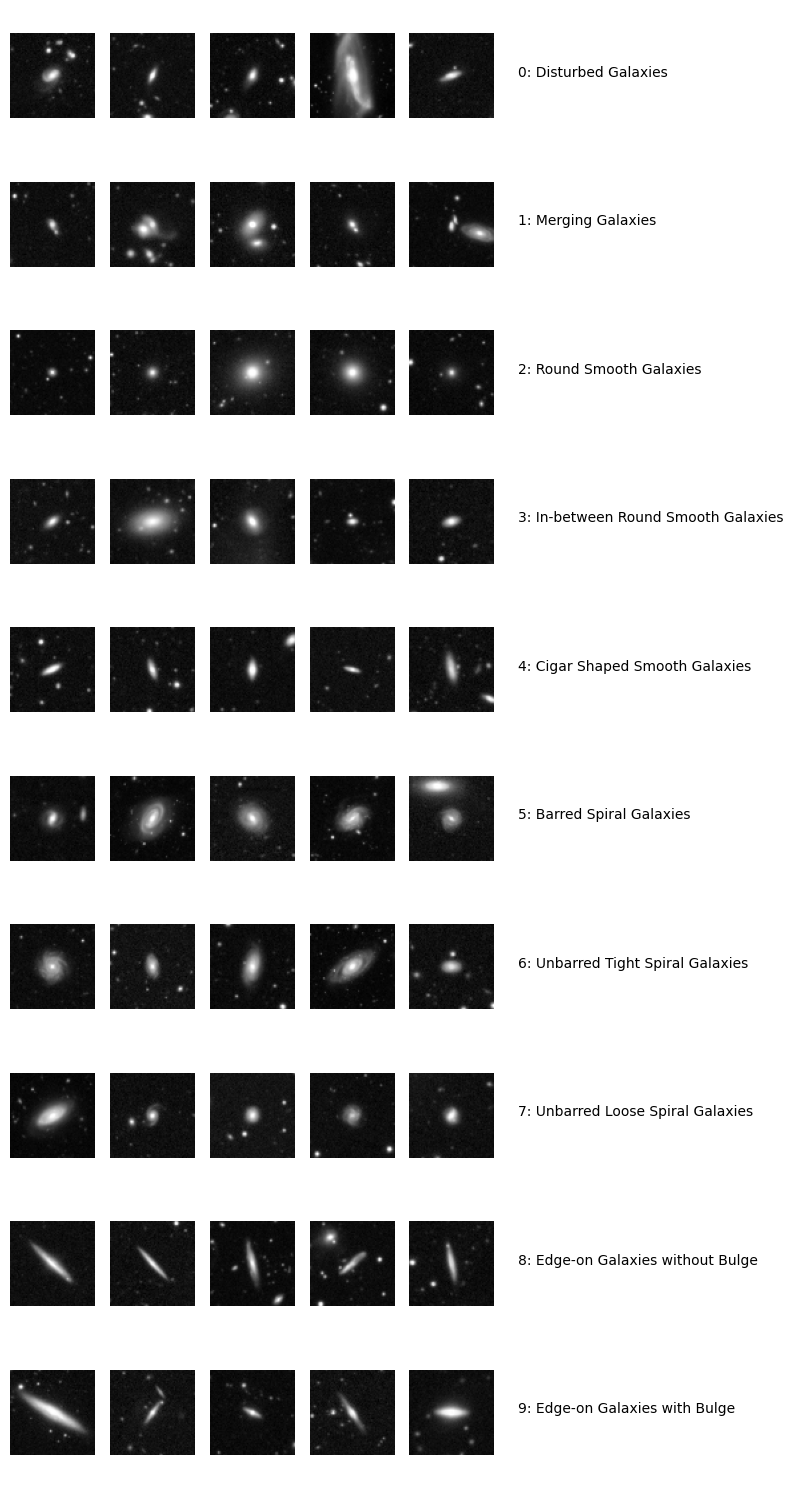

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = [
    'Disturbed Galaxies',
    'Merging Galaxies',
    'Round Smooth Galaxies',
    'In-between Round Smooth Galaxies',
    'Cigar Shaped Smooth Galaxies',
    'Barred Spiral Galaxies',
    'Unbarred Tight Spiral Galaxies',
    'Unbarred Loose Spiral Galaxies',
    'Edge-on Galaxies without Bulge',
    'Edge-on Galaxies with Bulge'
    ]

fig,ax = plt.subplots(10,6,figsize=(8,15))


for class_i in range(10):
    idxs = np.where( training_ds.labels == class_i )[0]
    idxs = np.random.permutation(idxs)
    for plot_i in range(np.min([5,len(idxs)])):

        ax[class_i][plot_i].imshow(training_ds[idxs[plot_i]][0].reshape(64,64),cmap='gray')
        ax[class_i][plot_i].set_axis_off()

    #Draw the label
    ax[class_i][5].text(0.1,0.5,f'{class_i}: {labels[class_i]}')
    ax[class_i][5].set_axis_off()

plt.tight_layout()
plt.show()

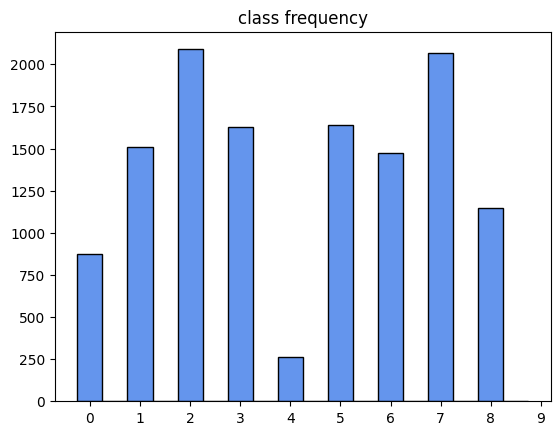

In [ ]:
plt.hist(training_ds.labels.data.numpy(),bins=np.linspace(0,9,19)-0.25,color='cornflowerblue',ec='k')
plt.xticks(np.arange(10))
plt.title('class frequency')
plt.show()

# Now lets build the neural network

its a classifier - it takes as input 64*64 numbers, and outputs 10 numbers

In [ ]:
from model import Net

In [ ]:
net = Net()

## check your model takes the input and returns the right shape for the output.
should be (Batch size, 10) for the 10 classes

In [ ]:
for x,y in training_dataloader:
    print(x.shape,net(x).shape,y.shape)
    break

torch.Size([300, 4096]) torch.Size([300, 10]) torch.Size([300])


## the training:


The network will be trained to predict a high value for output nodes that correspond to probable classes for the given example. The correct answer is, of course, only a single class. To compare the predicted values for each class and the correct class, we use a very popular loss function called CrossEntropy. It first transforms the network prediction into a set of probabilities for each class and then calculates a distance between predicted and target distributions using logarithmic values of the probabilities for each class.

To learn more check out these descriptions:
- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0

    loss = 0

    if torch.cuda.is_available():
        net.cuda()
    net.eval()

    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1

            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            pred = net(x)

            # print(pred[0])

            loss+= loss_func(pred,y).item()

            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)

    loss = loss/n_batches
    return correct/total, loss

In [ ]:
compute_accuracy_and_loss(training_dataloader,net)

(0.1155201578798985, 3.787724251548449)

In [ ]:
compute_accuracy_and_loss(valid_dataloader,net)

(0.11957134799774394, 3.801006317138672)

### A basic training loop

In [ ]:
if torch.cuda.is_available():
    net.cuda()

In [ ]:
from tqdm.notebook import tqdm

n_epochs = 150
best_loss = 1e9
best_acc = 0

training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

for epoch in pbar:

    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))

    net.train() # put the net into "training mode"
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()

        optimizer.zero_grad()
        pred = net(x)
        loss = loss_func(pred,y)
        loss.backward()
        optimizer.step()

    net.eval() #put the net into evaluation mode

    #evaluate accuracy and loss after this step and save for later
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)

    training_loss_vs_epoch.append( train_loss)
    training_acc_vs_epoch.append( train_acc )
    validation_loss_vs_epoch.append(valid_loss)
    validation_acc_vs_epoch.append(valid_acc)

    #save the model if the validation loss went lower than the previous best
    if valid_loss < best_loss:
        torch.save(net.state_dict(), 'trained_model.pt')
        best_loss = valid_loss
        best_acc = valid_acc

print('Best validation loss: ',best_loss)
print('Best validation accuracy: ',best_acc)


  0%|          | 0/80 [00:00<?, ?it/s]

Best validation loss:  1.2637758652369182
Best validation accuracy:  0.5662718556119571


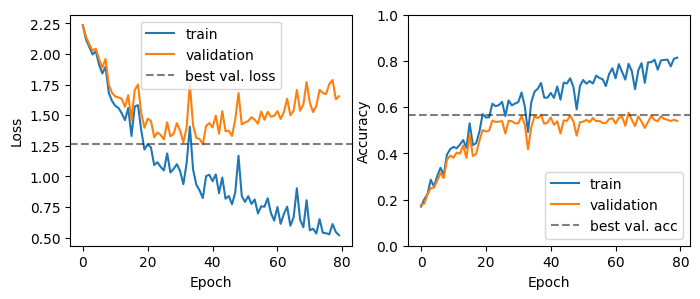

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='train')
ax[0].plot(validation_loss_vs_epoch,label='validation')
ax[0].axhline(best_loss,c='k',ls='--',label='best val. loss', alpha=0.5)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(training_acc_vs_epoch, label='train')
ax[1].plot(validation_acc_vs_epoch, label='validation')
ax[1].axhline(best_acc,c='k',ls='--',label='best val. acc', alpha=0.5)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0,1)

ax[0].legend()
ax[1].legend()

plt.show()